In [8]:
import cv2 
import os 
import numpy as np
import glob 
from scipy import signal
import matplotlib.pyplot as plt 
%matplotlib inline 
 

def gaussian_kernel(win_size, sigma):
    t = np.arange(win_size)
    x, y = np.meshgrid(t, t)
    o = (win_size - 1) / 2
    r = np.sqrt((x - o)**2 + (y - o)**2)
    scale = 1 / (sigma**2 * 2 * np.pi)
    return scale * np.exp(-0.5 * (r / sigma)**2)

gaussian_kernel(win_size=7, sigma=5)

array([[0.00444155, 0.00490867, 0.0052122 , 0.0053175 , 0.0052122 ,
        0.00490867, 0.00444155],
       [0.00490867, 0.00542492, 0.00576037, 0.00587674, 0.00576037,
        0.00542492, 0.00490867],
       [0.0052122 , 0.00576037, 0.00611658, 0.00624014, 0.00611658,
        0.00576037, 0.0052122 ],
       [0.0053175 , 0.00587674, 0.00624014, 0.0063662 , 0.00624014,
        0.00587674, 0.0053175 ],
       [0.0052122 , 0.00576037, 0.00611658, 0.00624014, 0.00611658,
        0.00576037, 0.0052122 ],
       [0.00490867, 0.00542492, 0.00576037, 0.00587674, 0.00576037,
        0.00542492, 0.00490867],
       [0.00444155, 0.00490867, 0.0052122 , 0.0053175 , 0.0052122 ,
        0.00490867, 0.00444155]])

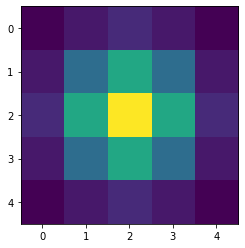

In [6]:
plt.imshow(gaussian_kernel(5,1))

image:
 [[131 127 125 ...  61  61  61]
 [128 128 129 ...  61  61  61]
 [129 130 130 ...  61  61  61]
 ...
 [138 138 136 ... 157 157 157]
 [134 132 130 ... 157 157 157]
 [140 136 133 ... 157 157 157]] 

post_gf_convolution:
 [[11 15 17 ...  8  7  5]
 [15 18 22 ... 10  9  7]
 [18 22 27 ... 12 10  8]
 ...
 [18 22 27 ... 32 27 21]
 [15 19 22 ... 27 22 18]
 [12 15 18 ... 21 18 14]] 



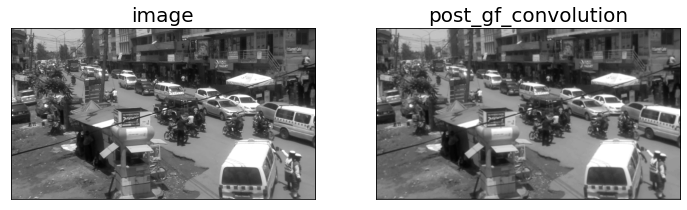

In [13]:
from scipy import signal
path = r'C:\Users\DELL\Downloads\Assignment 2 Folder-20220719\Experiental images\frame18756.jpg'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

#cv2.imshow('image', image)
print('image:\n', image, '\n')

post_gf_convolution = signal.convolve2d(
    image, 
    gaussian_kernel( win_size=7, sigma=5 ), 
    mode='same', boundary='fill', fillvalue=0
)
# mode='same', boundary='symm'
# mode='same', boundary='fill', fillvalue=0
post_gf_convolution = np.round(post_gf_convolution)
post_gf_convolution = post_gf_convolution.astype(np.uint8)

# cv2.imshow('post_gf_convolution', post_gf_convolution)
print('post_gf_convolution:\n', post_gf_convolution, '\n')

images = [image, post_gf_convolution]
images_title = ['image', 'post_gf_convolution']

plt.figure(figsize=(12, 6))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(images[i], cmap=plt.get_cmap('gray'))
    plt.title(images_title[i], fontsize=20)
    plt.xticks([]), plt.yticks([])

post_gf_convolution:
 [[ 53  72  72 ...  35  35  25]
 [ 73 100 100 ...  48  48  35]
 [ 73 101 102 ...  48  48  35]
 ...
 [ 77 105 104 ... 122 122  89]
 [ 77 105 103 ... 122 122  89]
 [ 56  76  75 ...  89  89  64]] 



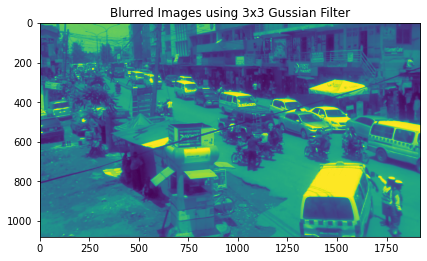

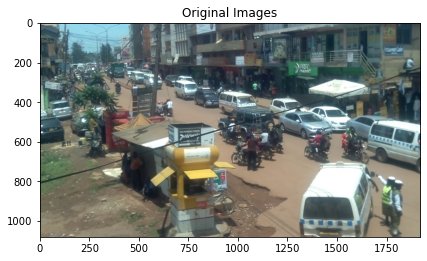

post_gf_convolution:
 [[ 53  73  72 ...  34  35  25]
 [ 73  99  99 ...  48  48  35]
 [ 72 100 100 ...  49  49  36]
 ...
 [ 75 103 101 ... 122 122  89]
 [ 76 103 101 ... 122 122  89]
 [ 55  75  74 ...  89  89  64]] 



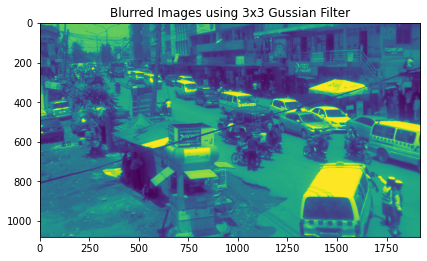

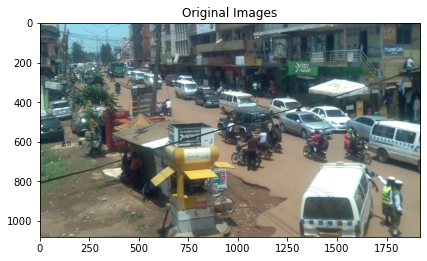

post_gf_convolution:
 [[ 53  72  71 ...  35  35  26]
 [ 72  99  99 ...  49  49  35]
 [ 71  99 101 ...  49  49  35]
 ...
 [ 76 103 101 ... 122 122  89]
 [ 76 103 101 ... 122 122  89]
 [ 55  75  74 ...  89  89  64]] 



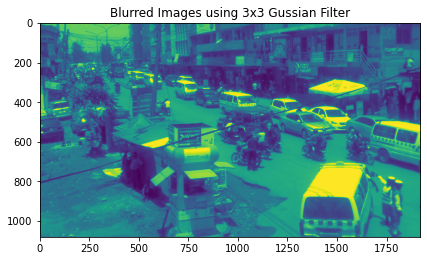

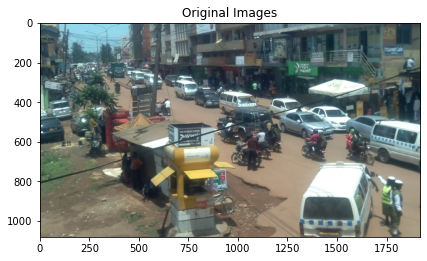

post_gf_convolution:
 [[ 57  77  74 ...  33  34  25]
 [ 75 103 100 ...  46  47  34]
 [ 71  98  97 ...  47  47  34]
 ...
 [ 76 104 102 ... 122 122  88]
 [ 76 104 102 ... 122 122  88]
 [ 56  75  74 ...  88  88  64]] 



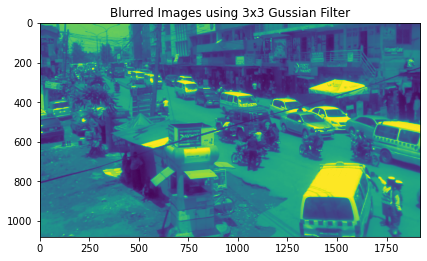

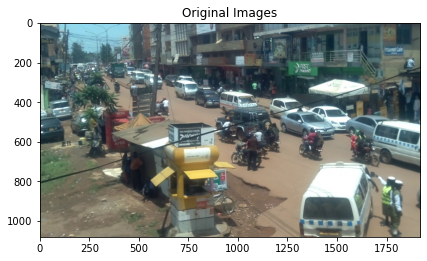

post_gf_convolution:
 [[ 56  74  72 ...  36  36  26]
 [ 75 101  99 ...  49  49  36]
 [ 73 100 100 ...  49  49  36]
 ...
 [ 76 105 104 ... 124 124  90]
 [ 77 106 105 ... 124 124  90]
 [ 56  77  77 ...  90  90  66]] 



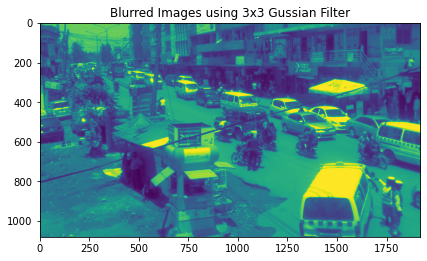

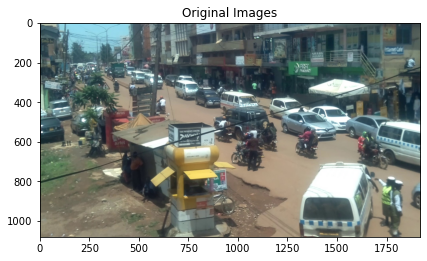

post_gf_convolution:
 [[ 62  85  81 ...  35  35  25]
 [ 80 110 106 ...  48  48  35]
 [ 72  99  98 ...  48  48  35]
 ...
 [ 76 105 103 ... 125 124  90]
 [ 78 106 104 ... 124 124  90]
 [ 58  78  75 ...  90  90  65]] 



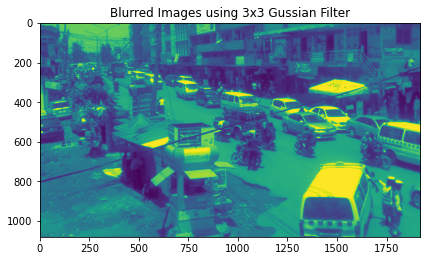

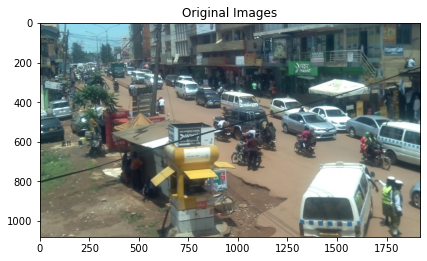

post_gf_convolution:
 [[ 59  79  76 ...  37  37  27]
 [ 77 104 101 ...  51  51  37]
 [ 71  97  96 ...  51  51  37]
 ...
 [ 77 105 104 ... 124 124  90]
 [ 77 106 104 ... 123 123  89]
 [ 57  77  75 ...  89  89  65]] 



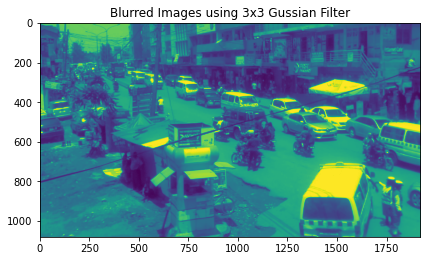

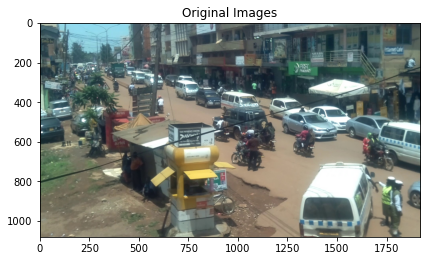

In [23]:
#Set the path where images are stored 
img_dir = "C:/Users/DELL/Documents/ComputerVision/" # Enter Directory of all images  
data_path = os.path.join(img_dir,'*jpg') 
files = glob.glob(data_path) 
data = []
data1= []
for f1 in files: 
    img = cv2.imread(f1,cv2.IMREAD_GRAYSCALE)
    images=cv2.imread(f1)
    rgb_img = cv2.cvtColor ( images , cv2.COLOR_BGR2RGB )
    data.append(img) 
    data1.append(images) 
    post_gf_convolution = signal.convolve2d(img,gaussian_kernel( win_size=3, sigma=1 ), 
    mode='same', boundary='fill', fillvalue=0
)
# mode='same', boundary='symm'
# mode='same', boundary='fill', fillvalue=0
    post_gf_convolution = np.round(post_gf_convolution)
    post_gf_convolution = post_gf_convolution.astype(np.uint8)

# cv2.imshow('post_gf_convolution', post_gf_convolution)
    print('post_gf_convolution:\n', post_gf_convolution, '\n')

    plt.figure(figsize=(15,14))
    plt.subplot(121),plt.imshow(post_gf_convolution),plt.title('Blurred Images using 3x3 Gussian Filter')
    plt.show()
    
    plt.figure(figsize=(15,14))
    plt.subplot(122),plt.imshow(rgb_img),plt.title('Original Images')
    plt.show()